Method one: from scipy import stats,        then use: stats.linregress(retMkt,retIBM) 
Method two: import statsmodels.api as sm,   then use: results=sm.OLS(retIBM, retMkt).fit()

In [82]:
import datetime as dt
import pandas_datareader.data as web
import numpy as np
from scipy import stats 
#Define your Start and End Dates
start = dt.datetime(2012,1,1)
end = dt.datetime(2016,12,31)

In [85]:
ticker='MSFT'
p =web.DataReader(ticker, 'yahoo', start=start,end=end  )
retIBM = (p.Close/p.Close.shift(1)-1).dropna()
retIBM.head()

Date
2012-01-04    0.023534
2012-01-05    0.010219
2012-01-06    0.015535
2012-01-09   -0.013163
2012-01-10    0.003605
Name: Close, dtype: float64

In [92]:
ticker='^GSPC'
p2 =web.DataReader(ticker, 'yahoo', start=start,end=end  )
retMkt = (p2.Close/p2.Close.shift(1)-1).dropna()
retMkt.head()

Date
2012-01-04    0.000188
2012-01-05    0.002944
2012-01-06   -0.002537
2012-01-09    0.002262
2012-01-10    0.008886
Name: Close, dtype: float64

In [93]:
(beta,alpha,r_value,p_value,std_err)=stats.linregress(retMkt,retIBM) 
print(alpha,beta) 
print("R-squared=", r_value**2)
print("p-value =", p_value)

0.0002443326781263552 1.1135153200786276
R-squared= 0.3746685140914817
p-value = 4.21060258803468e-130


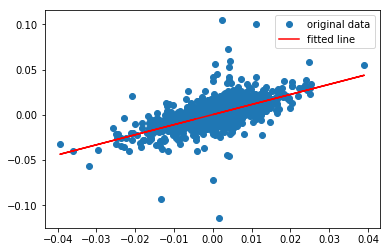

In [95]:
import matplotlib.pyplot as plt
plt.plot(retMkt, retIBM, 'o', label='original data')
plt.plot(retMkt, 0.0002443326781263552 + 1.113515*retMkt, 'r', label='fitted line')
plt.legend()
plt.show()

In [96]:
import statsmodels.api as sm

retMkt=sm.add_constant(retMkt)
results=sm.OLS(retIBM, retMkt).fit()
print(results.params)
   

const    0.000244
Close    1.113515
dtype: float64


In [97]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     751.9
Date:                Thu, 06 Sep 2018   Prob (F-statistic):          4.21e-130
Time:                        17:20:34   Log-Likelihood:                 3815.8
No. Observations:                1257   AIC:                            -7628.
Df Residuals:                    1255   BIC:                            -7617.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.000      0.743      0.4

In [98]:
help(sm)

Help on module statsmodels.api in statsmodels:

NAME
    statsmodels.api - Statistical models

DESCRIPTION
     - standard `regression` models
    
      - `GLS` (generalized least squares regression)
      - `OLS` (ordinary least square regression)
      - `WLS` (weighted least square regression)
      - `GLASAR` (GLS with autoregressive errors model)
    
     - `GLM` (generalized linear models)
     - robust statistical models
    
      - `RLM` (robust linear models using M estimators)
      - `robust.norms` estimates
      - `robust.scale` estimates (MAD, Huber's proposal 2).
     - sandbox models
      - `mixed` effects models
      - `gam` (generalized additive models)

DATA
    test = <statsmodels.__init__.PytestTester object>

FILE
    c:\users\kevindai\anaconda3\lib\site-packages\statsmodels\api.py


